In [ ]:
# https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html#

In [2]:
# imports 

import numpy as np
import pandas as pd
import multiprocessing

import matplotlib.pyplot as plt
import bokeh
import bokeh.io
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

import seaborn as sns

# import re
# import math
# import copy

# from collections import defaultdict
# import csv
# import itertools
# import datetime 
# from datetime import datetime
# import time
# import dateutil.parser
# import pickle
# import random

# import gc
# import zipfile
# import sys, getopt
# import os

from IPython.core.interactiveshell import InteractiveShell
from io import StringIO

# import dask.dataframe as dd

InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from random import sample 


import dask.dataframe as dd
import functools
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Survival Analysis 101

In [ ]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

N = 25

CURRENT_TIME = 10

actual_lifetimes = np.array([exponential(12) if (uniform() < 0.5) else exponential(2) for i in range(N)])

observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)
death_observed = actual_lifetimes < CURRENT_TIME

Observed lifetimes at time 10:
 [10.          2.85858376  2.38321525  0.89057726  1.06694997 10.
  1.49407421  0.22550269  4.67261525  4.50840484 10.          1.17270078
  1.68376787  4.63219883  4.1859607   1.55325508  2.62645093 10.
 10.          8.2530049   3.3703558   2.19286561  8.29255644  1.29137542
 10.        ]


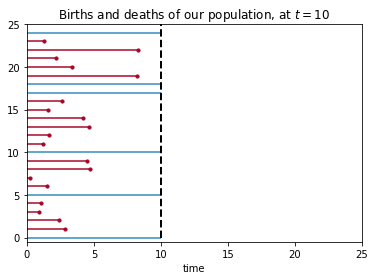

In [28]:
ax = plot_lifetimes(observed_lifetimes, event_observed = death_observed, sort_by_duration=False)

ax.set_xlim(0, 25)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("time")
ax.set_title("Births and deaths of our population, at $t=10$")
print("Observed lifetimes at time %d:\n" % (CURRENT_TIME), observed_lifetimes)

pass;

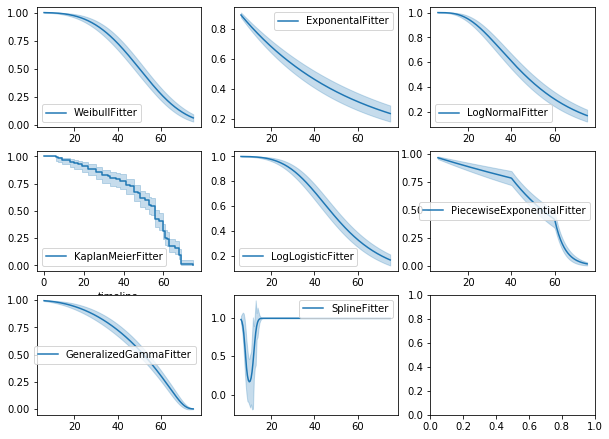

In [29]:
from lifelines import (WeibullFitter, ExponentialFitter,
LogNormalFitter, LogLogisticFitter, NelsonAalenFitter,
PiecewiseExponentialFitter, GeneralizedGammaFitter, SplineFitter)

from lifelines.datasets import load_waltons
data = load_waltons()

from lifelines import KaplanMeierFitter

fig, axes = plt.subplots(3, 3, figsize=(10, 7.5))

T = data['T']
E = data['E']

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentalFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
gg = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')
spf = SplineFitter([6, 20, 40, 75]).fit(T, E, label='SplineFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
gg.plot_survival_function(ax=axes[2][0])
spf.plot_survival_function(ax=axes[2][1])

pass;

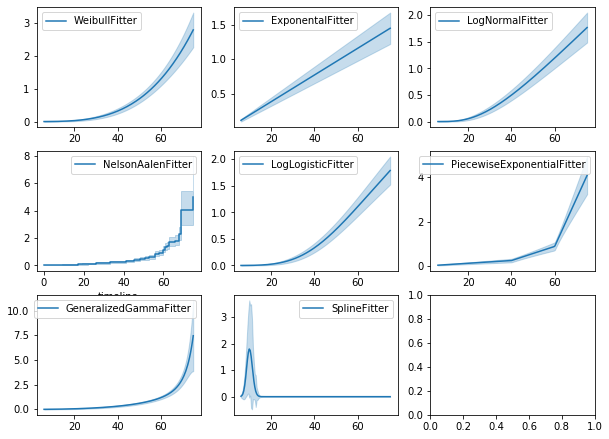

In [14]:
naf = NelsonAalenFitter().fit(T, E, label='NelsonAalenFitter')

fig, axes = plt.subplots(3, 3, figsize=(10, 7.5))


wbf.plot_cumulative_hazard(ax=axes[0][0])
exf.plot_cumulative_hazard(ax=axes[0][1])
lnf.plot_cumulative_hazard(ax=axes[0][2])
naf.plot_cumulative_hazard(ax=axes[1][0])
llf.plot_cumulative_hazard(ax=axes[1][1])
pwf.plot_cumulative_hazard(ax=axes[1][2])
gg.plot_cumulative_hazard(ax=axes[2][0])
spf.plot_cumulative_hazard(ax=axes[2][1])

pass;

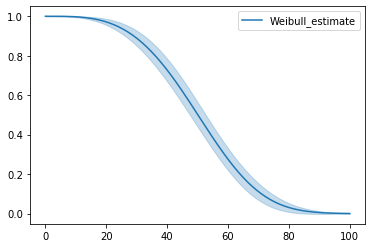

In [12]:
timeline = np.linspace(0, 100, 200)

# directly compute the survival function, these return a pandas Series
wbf = WeibullFitter().fit(T, E)
# wbf.survival_function_at_times(timeline)
# wbf.hazard_at_times(timeline)
# wbf.cumulative_hazard_at_times(timeline)

# use the `timeline` kwarg in `fit`
# by default, all functions and properties will use
# these values provided
wbf = WeibullFitter().fit(T, E, timeline=timeline)


wbf.plot_survival_function()

## CPH Survival Regression Models

In [17]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi_dataset = load_rossi()

In [19]:
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest')

cph.print_summary()  # access the results using cph.summary

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

In [25]:
X = rossi_dataset

cph.predict_partial_hazard(X)[:5]
cph.predict_survival_function(X).loc[:5, :5]
cph.predict_median(X)[:5]

,0
0,1.219126
1,3.230250
2,3.031058
3,0.487712
4,1.214025


,0,1,2,3,4,5
1.0,0.997616,0.993695,0.994083,0.999045,0.997626,0.997578
2.0,0.995230,0.987411,0.988183,0.998089,0.995250,0.995154
3.0,0.992848,0.981162,0.982314,0.997133,0.992878,0.992734
4.0,0.990468,0.974941,0.976468,0.996176,0.990507,0.990316
5.0,0.988085,0.968739,0.970639,0.995216,0.988135,0.987895


,0.5
0,inf
1,44.0
2,46.0
3,inf
4,inf


In [27]:
# filter down to just censored subjects to predict remaining survival
censored_subjects = X.loc[~X['arrest'].astype(bool)]
censored_subjects_last_obs = censored_subjects['week']

# cph.predict_survival_function(censored_subjects, times = [5., 25., 50.], conditional_after = censored_subjects_last_obs)
cph.predict_median(
    censored_subjects, 
    conditional_after = censored_subjects_last_obs)


,0.5
3,inf
4,inf
5,inf
7,inf
8,inf
9,inf
10,inf
11,inf
13,inf
17,inf


In [ ]:
cph.plot_covariate_groups('prio', [0, 2, 4, 6, 8, 10], cmap='coolwarm')


## Stratification

In [ ]:
# rossi_dataset = load_rossi()
# cph = CoxPHFitter()
cph.fit(rossi_dataset, 'week', event_col='arrest', strata=['race'])

cph.print_summary() 

## Clusters & correlations 

In [ ]:

from lifelines import CoxPHFitter

df = pd.DataFrame({
    'T': [5, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'E': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    'month': [10, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'age': [4, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'id': [1, 1, 1, 1, 2, 3, 3, 4, 4, 5, 6, 7]
})

cph = CoxPHFitter()
cph.fit(df, 'T', 'E', cluster_col='id')
cph.print_summary()

## Model selection for parametric models

In [ ]:
from lifelines import LogLogisticAFTFitter, WeibullAFTFitter, LogNormalAFTFitter
from lifelines.datasets import load_rossi

In [ ]:
rossi = load_rossi()

In [ ]:
rossi.head()
rossi.shape
rossi.arrest.mean()
rossi.query("arrest == 1").week.hist()

In [ ]:
llf = LogLogisticAFTFitter().fit(rossi, 'week', 'arrest')
lnf = LogNormalAFTFitter().fit(rossi, 'week', 'arrest')
wf = WeibullAFTFitter().fit(rossi, 'week', 'arrest')

print(llf.log_likelihood_)  # -679.938
print(lnf.log_likelihood_)  # -683.234
print(wf.log_likelihood_)   # -679.916, slightly the best model.

In [ ]:
# with some heterogeneity in the ancillary parameters
ancillary_df = rossi[['prio']]
llf = LogLogisticAFTFitter().fit(rossi, 'week', 'arrest', ancillary_df=ancillary_df)
lnf = LogNormalAFTFitter().fit(rossi, 'week', 'arrest', ancillary_df=ancillary_df)
wf = WeibullAFTFitter().fit(rossi, 'week', 'arrest', ancillary_df=ancillary_df)

print(llf.log_likelihood_) # -678.94, slightly the best model.
print(lnf.log_likelihood_) # -680.39
print(wf.log_likelihood_)  # -679.60

## Spline fitter

<lifelines.SplineFitter:"Spline_estimate", fitted with 163 total observations, 7 right-censored observations>

AttributeError: 'SplineFitter' object has no attribute 'knots'

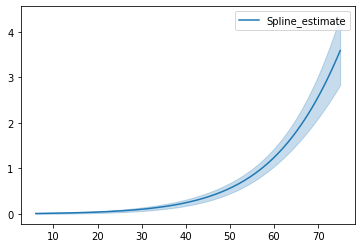

In [32]:
from lifelines import SplineFitter
from lifelines.datasets import load_waltons

waltons = load_waltons()
T, E = waltons['T'], waltons['E']

knots = np.percentile(T.loc[E.astype(bool)], [0, 50, 100])
sf = SplineFitter(knots)
sf.fit(T, E)
sf.plot()
print(sf.knots)